In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [228]:
df = pd.read_csv('../data/data/features_3_sec.csv')

In [229]:
df.shape

(9990, 60)

In [230]:
df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [231]:
# df.sample(10).T

In [232]:
X, y = df.iloc[:, 2:-1], df['label']

In [233]:
from sklearn.model_selection import train_test_split

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [235]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [236]:
# model = LogisticRegression()
# model = KNeighborsClassifier()
# model = GaussianNB()
# model = RandomForestClassifier()
model = XGBClassifier()

In [237]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [238]:
from sklearn.metrics import classification_report, confusion_matrix

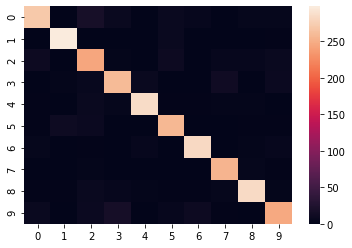

In [239]:
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)));

In [240]:
confusion_matrix(y_test, model.predict(X_test))

array([[271,   1,  18,   8,   1,   7,   5,   0,   4,   4],
       [  0, 298,   0,   0,   0,   8,   0,   0,   0,   2],
       [ 10,   0, 245,   3,   0,  10,   1,   5,   5,   7],
       [  1,   3,   6, 260,   7,   1,   1,  12,   1,   9],
       [  2,   1,   7,   4, 286,   2,   2,   3,   3,   1],
       [  2,  11,   9,   1,   0, 258,   0,   1,   2,   2],
       [  4,   0,   2,   1,   5,   0, 283,   0,   3,   5],
       [  0,   0,   3,   1,   1,   0,   0, 256,   4,   2],
       [  2,   2,   8,   5,   3,   2,   2,   4, 285,   3],
       [  7,   1,   9,  17,   1,   5,  10,   2,   1, 247]])

In [241]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

       blues       0.91      0.85      0.88       319
   classical       0.94      0.97      0.95       308
     country       0.80      0.86      0.83       286
       disco       0.87      0.86      0.87       301
      hiphop       0.94      0.92      0.93       311
        jazz       0.88      0.90      0.89       286
       metal       0.93      0.93      0.93       303
         pop       0.90      0.96      0.93       267
      reggae       0.93      0.90      0.91       316
        rock       0.88      0.82      0.85       300

    accuracy                           0.90      2997
   macro avg       0.90      0.90      0.90      2997
weighted avg       0.90      0.90      0.90      2997



In [242]:
(pd.DataFrame({'col': X_test.columns.to_list(), 
               'val': model.feature_importances_})
 .sort_values(by='val', ascending=False)
 .head(10)['col']
 .to_list())

['perceptr_var',
 'spectral_bandwidth_mean',
 'mfcc4_mean',
 'chroma_stft_var',
 'chroma_stft_mean',
 'mfcc1_var',
 'rolloff_var',
 'rolloff_mean',
 'rms_var',
 'mfcc1_mean']